In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [35]:
Japan = pd.read_csv(r'D:\death_rate_project\Japan.csv')
Switzerland = pd.read_csv(r'D:\death_rate_project\Switzerland.csv')

1. An overview of the death rate in 2 countries of all age and sex groups

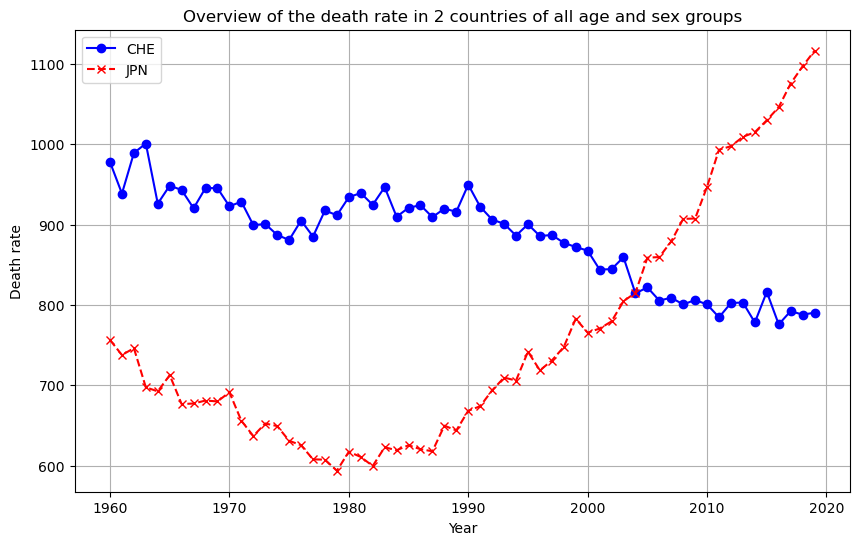

In [38]:
overall_che = Switzerland[(Switzerland['Sex'] == 'All') & (Switzerland['Age Group'] == '[All]')]
year_che = overall_che['Year']
death_rate_che = overall_che['Death rate per 100 000 population']

overall_jpn = Japan[(Japan['Sex'] == 'All') & (Japan['Age Group'] == '[All]')]
year_jpn = overall_jpn['Year']
death_rate_jpn = overall_jpn['Death rate per 100 000 population']

plt.figure(figsize = (10,6))
plt.plot(year_che, death_rate_che, label = 'CHE', marker = 'o', linestyle = '-', color = 'blue')
plt.plot(year_jpn,death_rate_jpn, label = 'JPN', marker = 'x', linestyle = '--', color = 'red')
plt.xlabel('Year')
plt.ylabel('Death rate')
plt.title('Overview of the death rate in 2 countries of all age and sex groups')
plt.grid(True)
plt.legend()
plt.show()

In [39]:
overall_che.describe()

,Year,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
count,60.000000,60.000000,60.0,60.000000,60.000000
mean,1989.500000,60197.016667,100.0,552.767119,883.499273
std,17.464249,3710.413767,0.0,174.510774,59.242321
min,1960.000000,51004.000000,100.0,306.362362,775.843517
25%,1974.750000,57304.250000,100.0,394.110890,820.473617
50%,1989.500000,60702.000000,100.0,537.627700,900.511276
75%,2004.250000,62583.750000,100.0,677.239364,924.214058
max,2019.000000,67780.000000,100.0,884.005746,1000.807825


In [40]:
print(f"The max death rate of Switzerland is 1000.81 per 100 000 population, appears in the year {overall_che[overall_che['Death rate per 100 000 population']==1000.807825]['Year'].values[0]}")
print(f"The min death rate of Switzerland is 775.84 per 100 000 population , appears in the year {overall_che[overall_che['Death rate per 100 000 population']==775.8435167]['Year'].values[0]}")

The max death rate of Switzerland is 1000.81 per 100 000 population, appears in the year 1963
The min death rate of Switzerland is 775.84 per 100 000 population , appears in the year 2016


In [41]:
overall_jpn.describe()

,Year,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
count,60.000000,6.000000e+01,60.0,60.000000,60.000000
mean,1989.500000,8.949321e+05,100.0,545.560208,758.123509
std,17.464249,2.242467e+05,0.0,223.169609,146.690909
min,1960.000000,6.703420e+05,100.0,287.203532,593.856532
25%,1974.750000,7.057668e+05,100.0,357.939281,648.041120
50%,1989.500000,8.066595e+05,100.0,471.025781,707.858687
75%,2004.250000,1.042400e+06,100.0,711.420173,826.098823
max,2019.000000,1.381093e+06,100.0,1048.155540,1116.204537


In [42]:
print(f"The max death rate of Japan is 1116.20 per 100 000 population, appears in the year {overall_jpn[overall_jpn['Death rate per 100 000 population']==1116.204537]['Year'].values[0]}")
print(f"The min death rate of Japan is 593.86 per 100 000 population, appears in the year {overall_jpn[overall_jpn['Death rate per 100 000 population']==593.8565319]['Year'].values[0]}")

The max death rate of Japan is 1116.20 per 100 000 population, appears in the year 2019
The min death rate of Japan is 593.86 per 100 000 population, appears in the year 1979


Group by decade

In [43]:
overall_che = overall_che.copy()  

# Group by decade
overall_che.loc[:, 'Decade'] = (overall_che['Year'] // 10) * 10

# Caculate mean and variance
result_che = overall_che.groupby('Decade').agg({'Death rate per 100 000 population': ['mean', 'var']})

result_che.index = result_che.index.astype(str)  
result_che.index = result_che.index + 's' 
result_che = result_che.reset_index()

result_che.columns = ['Decade', 'Death rate Mean', 'Death rate Variance']

print(result_che)

  Decade  Death rate Mean  Death rate Variance
0  1960s       953.456742           715.405319
1  1970s       903.846087           267.148176
2  1980s       924.405990           150.419882
3  1990s       898.768607           536.309001
4  2000s       827.323057           599.030972
5  2010s       793.195157           155.906061


In [44]:
overall_jpn = overall_jpn.copy()
overall_jpn.loc[:,'Decade'] = (overall_jpn['Year'] // 10)*10
result_jpn = overall_jpn.groupby('Decade').agg({'Death rate per 100 000 population':['mean','var']})
result_jpn.index = result_jpn.index.astype(str)
result_jpn.index = result_jpn.index + 's'
result_jpn = result_jpn.reset_index()
result_jpn.columns = ['Decade','Death rate mean','Death rate variance']
print(result_jpn)

  Decade  Death rate mean  Death rate variance
0  1960s       705.867860           936.697933
1  1970s       635.262682           823.984328
2  1980s       622.860485           213.959599
3  1990s       717.404191          1223.991918
4  2000s       834.770052          2989.345667
5  2010s      1032.575784          2677.783286


2. Compare two genders in CHE and JPN during the same period

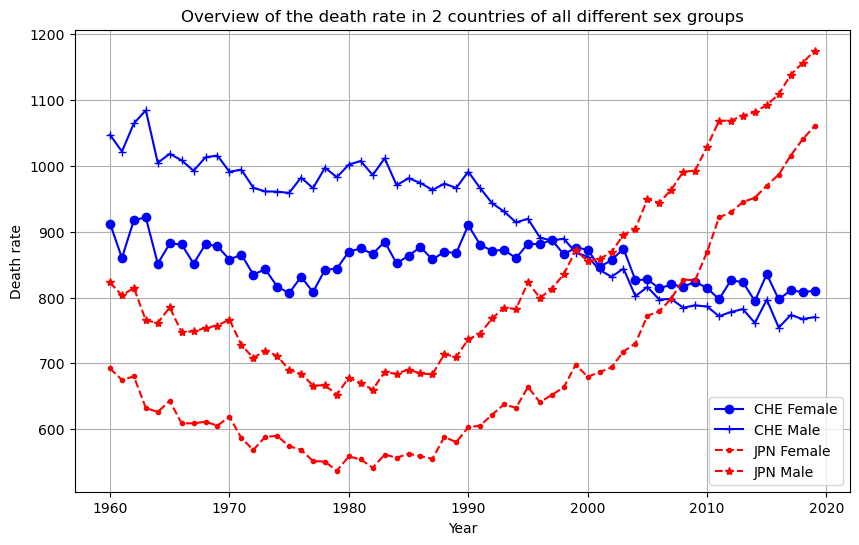

In [45]:
female_che = Switzerland[(Switzerland['Sex'] == 'Female') & (Switzerland['Age Group'] == '[All]')]
year_f_che = female_che['Year']
death_rate_f_che = female_che['Death rate per 100 000 population']

male_che = Switzerland[(Switzerland['Sex'] == 'Male') & (Switzerland['Age Group'] == '[All]')]
year_m_che = male_che['Year']
death_rate_m_che = male_che['Death rate per 100 000 population']

female_jpn = Japan[(Japan['Sex']== 'Female') & (Japan['Age Group'] == '[All]')]
year_f_jpn = female_jpn['Year']
death_rate_f_jpn = female_jpn['Death rate per 100 000 population']

male_jpn = Japan[(Japan['Sex']== 'Male') & (Japan['Age Group'] == '[All]')]
year_m_jpn = male_jpn['Year']
death_rate_m_jpn = male_jpn['Death rate per 100 000 population']

plt.figure(figsize = (10,6))
plt.plot(year_f_che, death_rate_f_che, label = 'CHE Female', marker = 'o', linestyle = '-', color = 'blue')
plt.plot(year_m_che, death_rate_m_che, label = 'CHE Male', marker = '+', linestyle = '-', color = 'blue')
plt.plot(year_f_jpn, death_rate_f_jpn, label = 'JPN Female', marker = '.', linestyle = '--', color = 'red')
plt.plot(year_m_jpn, death_rate_m_jpn, label = 'JPN Male', marker = '*', linestyle = '--', color = 'red')

plt.xlabel('Year')
plt.ylabel('Death rate')
plt.title('Overview of the death rate in 2 countries of all different sex groups')
plt.grid(True)
plt.legend()
plt.show()

In [46]:
female_che.describe()

,Year,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
count,60.000000,60.000000,60.0,60.000000,60.000000
mean,1989.500000,29797.766667,100.0,435.329814,852.477198
std,17.464249,2833.710560,0.0,144.121614,31.681057
min,1960.000000,24081.000000,100.0,253.663950,794.767414
25%,1974.750000,27251.750000,100.0,310.906004,825.655264
50%,1989.500000,30045.500000,100.0,400.907581,857.679628
75%,2004.250000,32008.000000,100.0,527.017490,874.868803
max,2019.000000,35025.000000,100.0,728.028206,921.625594


In [47]:
male_che.describe()

,Year,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
count,60.000000,60.000000,60.0,60.000000,60.000000
mean,1989.500000,30399.250000,100.0,705.821251,916.246117
std,17.464249,1188.912388,0.0,216.734378,95.611297
min,1960.000000,26923.000000,100.0,367.870220,754.269969
25%,1974.750000,29714.750000,100.0,500.873408,812.498969
50%,1989.500000,30420.500000,100.0,721.581371,961.037159
75%,2004.250000,31207.000000,100.0,877.411150,991.568837
max,2019.000000,32755.000000,100.0,1087.396261,1084.483132


In [48]:
female_jpn.describe()

,Year,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
count,60.000000,60.000000,60.0,60.000000,60.000000
mean,1989.500000,415525.450000,100.0,428.067290,689.225034
std,17.464249,112563.739376,0.0,201.478992,145.562345
min,1960.000000,306986.000000,100.0,208.528267,536.838856
25%,1974.750000,324971.500000,100.0,253.717437,584.999435
50%,1989.500000,370753.500000,100.0,358.260515,635.004032
75%,2004.250000,478335.250000,100.0,583.152874,740.673882
max,2019.000000,673672.000000,100.0,889.259859,1060.514293


In [49]:
male_jpn.describe()

,Year,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
count,60.000000,60.000000,60.0,60.000000,60.000000
mean,1989.500000,479406.633333,100.0,697.998168,829.883954
std,17.464249,112137.602202,0.0,250.081251,148.988162
min,1960.000000,361469.000000,100.0,383.435237,652.641465
25%,1974.750000,379308.500000,100.0,494.672444,711.013591
50%,1989.500000,435906.000000,100.0,622.880339,783.541123
75%,2004.250000,563165.250000,100.0,875.276964,914.384970
max,2019.000000,707421.000000,100.0,1249.502493,1174.961136


3. Compare different age groups in CHE and JPN during the same period

I. Japan

In [82]:
filtered_df = Japan[Japan['Sex'] == 'All']

# Group by age group and caculate the average death rate
average_death_rate_jpn = filtered_df.groupby('Age Group')['Death rate per 100 000 population'].mean()

print(average_death_rate_jpn)


Age Group
[0]          781.422116
[1-4]         63.198763
[10-14]       19.360008
[15-19]       46.517995
[20-24]       66.626670
[25-29]       73.587714
[30-34]       88.410487
[35-39]      122.225673
[40-44]      182.293786
[45-49]      282.936109
[5-9]         26.498756
[50-54]      440.276268
[55-59]      683.432761
[60-64]     1073.640749
[65-69]     1735.093889
[70-74]     2896.295422
[75-79]     4957.803192
[80-84]     8427.521853
[85+]      16099.618227
[All]        758.123509
Name: Death rate per 100 000 population, dtype: float64


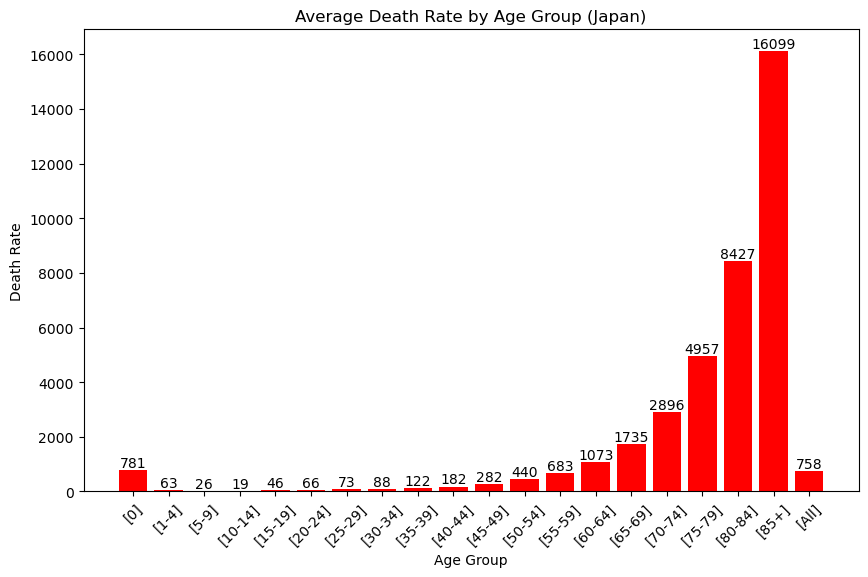

In [87]:
average_death_rate_jpn = {
    'Age Group': ['[0]', '[1-4]', '[5-9]', '[10-14]', '[15-19]', '[20-24]', '[25-29]', '[30-34]', '[35-39]', '[40-44]', '[45-49]',  '[50-54]', '[55-59]', '[60-64]', '[65-69]', '[70-74]', '[75-79]', '[80-84]', '[85+]', '[All]'],
    'Death rate': [781.422116, 63.198763, 26.498756, 19.360008, 46.517995, 66.626670, 73.587714, 88.410487, 122.225673, 182.293786, 282.936109,  440.276268, 683.432761, 1073.640749, 1735.093889, 2896.295422, 4957.803192, 8427.521853, 16099.618227, 758.123509]
}
age_groups = average_death_rate_jpn['Age Group']
death_rates = average_death_rate_jpn['Death rate']

plt.figure(figsize=(10, 6))
bars = plt.bar(age_groups, death_rates, color='red')
plt.bar(age_groups, death_rates, color='red')
plt.xlabel('Age Group')
plt.ylabel('Death Rate')
plt.title('Average Death Rate by Age Group (Japan)')
plt.xticks(rotation=45)

for bar, rate in zip(bars, death_rates):
    plt.text(bar.get_x() + bar.get_width() / 2, rate, int(rate), ha='center', va='bottom')

plt.show()


1) Correlation coefficient between age and death rate in Japan

Correlation coefficient (r): 0.67


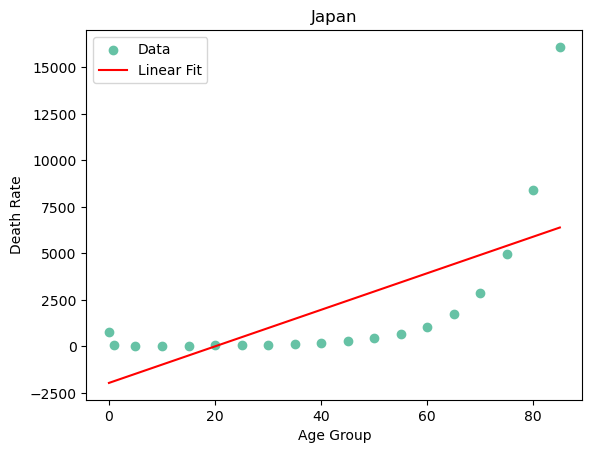

In [97]:

from scipy import stats

age_group = np.array([0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])
death_rate = np.array([781.422116, 63.198763, 26.498756, 19.360008, 46.517995, 66.626670, 73.587714, 88.410487, 122.225673, 182.293786, 282.936109, 440.276268, 683.432761, 1073.640749, 1735.093889, 2896.295422, 4957.803192, 8427.521853, 16099.618227])

slope, intercept, r_value, p_value, std_err = stats.linregress(age_group, death_rate)

plt.scatter(age_group, death_rate, label="Data")
plt.plot(age_group, slope * age_group + intercept, color='red', label="Linear Fit")
plt.xlabel("Age Group")
plt.ylabel("Death Rate")
plt.title('Japan')
plt.legend()

print(f"Correlation coefficient (r): {r_value:.2f}")

plt.show()


2.Exponential fit for death rate by age group in Japan

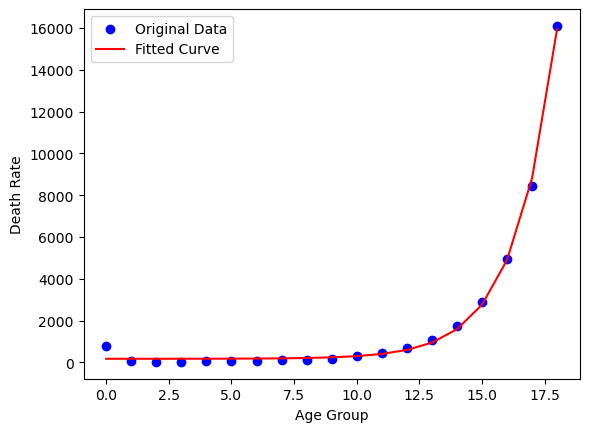

R-squared (R²): 0.9975130636396005


In [140]:
from scipy.optimize import curve_fit

def fit_exponential_curve(age_groups, death_rates):
    def exponential_func(x, a, b, c):
        return a * np.exp(b * x) + c

    params, covariance = curve_fit(exponential_func, age_groups, death_rates)

    a, b, c = params

    fitted_death_rates = exponential_func(age_groups, a, b, c)

    residuals = death_rates - fitted_death_rates
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((death_rates - np.mean(death_rates))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.scatter(age_groups, death_rates, label='Original Data', color='blue')
    plt.plot(age_groups, fitted_death_rates, label='Fitted Curve', color='red')
    plt.xlabel('Age Group')
    plt.ylabel('Death Rate')
    plt.legend()
    plt.show()

    return r_squared

age_groups = np.arange(19)  
death_rates = [781.422116, 63.198763, 26.498756, 19.360008, 46.517995, 66.626670, 73.587714, 88.410487, 122.225673, 182.293786, 282.936109, 440.276268, 683.432761, 1073.640749, 1735.093889, 2896.295422, 4957.803192, 8427.521853, 16099.618227]
r_squared = fit_exponential_curve(age_groups, death_rates)
print("R-squared (R²):", r_squared)


3. Polynomial fitting

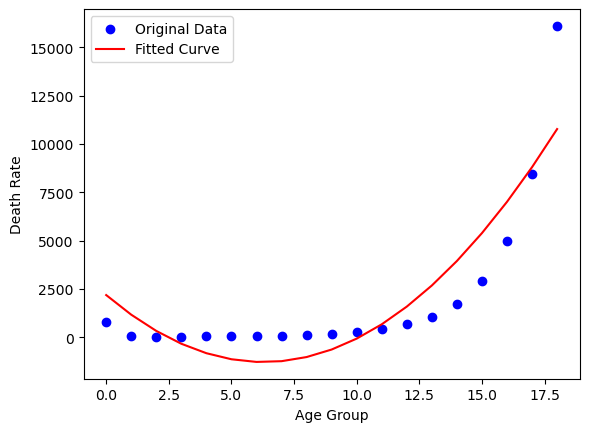

R-squared (R²): 0.7997446175082119


In [147]:
def fit_polynomial_curve(degree, age_groups, death_rates):
    
    coefficients = np.polyfit(age_groups, death_rates, degree)
    polynomial = np.poly1d(coefficients)  

    fitted_death_rates = polynomial(age_groups)

    residuals = death_rates - fitted_death_rates
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((death_rates - np.mean(death_rates))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.scatter(age_groups, death_rates, label='Original Data', color='blue')
    plt.plot(age_groups, fitted_death_rates, label='Fitted Curve', color='red')
    plt.xlabel('Age Group')
    plt.ylabel('Death Rate')
    plt.legend()
    plt.show()

    print("R-squared (R²):", r_squared)

degree = 2
age_groups = np.arange(19)  
death_rates = [781.422116, 63.198763, 26.498756, 19.360008, 46.517995, 66.626670, 73.587714, 88.410487, 122.225673, 182.293786, 282.936109, 440.276268, 683.432761, 1073.640749, 1735.093889, 2896.295422, 4957.803192, 8427.521853, 16099.618227]

fit_polynomial_curve(degree, age_groups, death_rates)


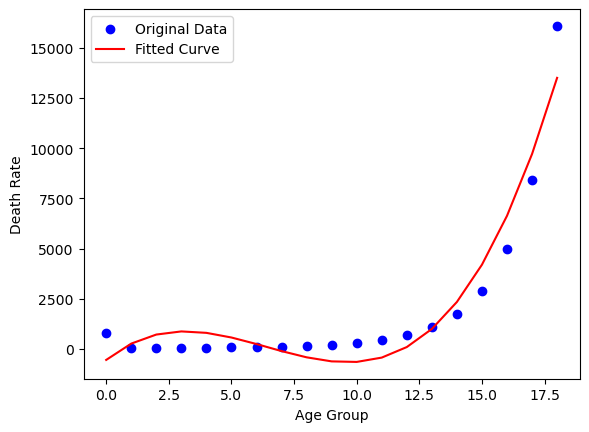

R-squared (R²): 0.9314201209242006


In [148]:
degree = 3
age_groups = np.arange(19)  
death_rates = [781.422116, 63.198763, 26.498756, 19.360008, 46.517995, 66.626670, 73.587714, 88.410487, 122.225673, 182.293786, 282.936109, 440.276268, 683.432761, 1073.640749, 1735.093889, 2896.295422, 4957.803192, 8427.521853, 16099.618227]

fit_polynomial_curve(degree, age_groups, death_rates)

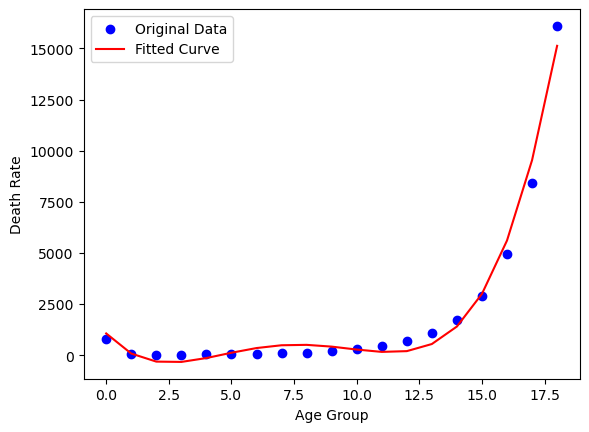

R-squared (R²): 0.9859900134324087


In [149]:
degree = 4
age_groups = np.arange(19)  
death_rates = [781.422116, 63.198763, 26.498756, 19.360008, 46.517995, 66.626670, 73.587714, 88.410487, 122.225673, 182.293786, 282.936109, 440.276268, 683.432761, 1073.640749, 1735.093889, 2896.295422, 4957.803192, 8427.521853, 16099.618227]

fit_polynomial_curve(degree, age_groups, death_rates)

II. Switzerland

In [53]:
filtered_df_che = Switzerland[Switzerland['Sex'] == 'All']

#Group by age group, caculate average death rate for different age groups
average_death_rate_che = filtered_df_che.groupby('Age Group')['Death rate per 100 000 population'].mean()

print(average_death_rate_che)

Age Group
[0]          868.436500
[1-4]         47.700580
[10-14]       21.786966
[15-19]       55.370057
[20-24]       81.494782
[25-29]       76.897437
[30-34]       84.380682
[35-39]      109.057212
[40-44]      165.724616
[45-49]      264.587196
[5-9]         24.522146
[50-54]      427.775572
[55-59]      687.391956
[60-64]     1093.365944
[65-69]     1762.592939
[70-74]     2862.457383
[75-79]     4827.363131
[80-84]     8408.559995
[85+]      17638.663727
[All]        883.499273
Name: Death rate per 100 000 population, dtype: float64


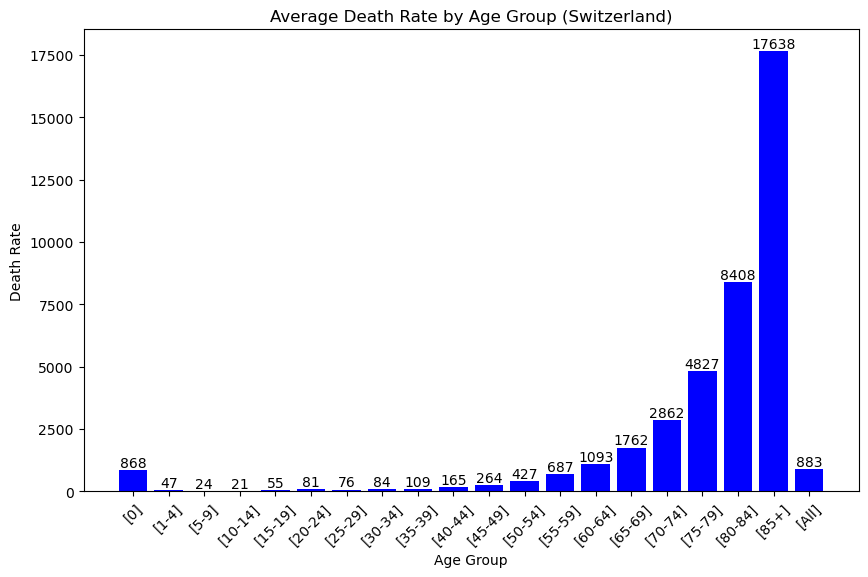

In [80]:
average_death_rate_che = {
    'Age Group': ['[0]', '[1-4]', '[5-9]', '[10-14]', '[15-19]', '[20-24]', '[25-29]', '[30-34]', '[35-39]', '[40-44]',
                 '[45-49]',  '[50-54]', '[55-59]', '[60-64]', '[65-69]', '[70-74]', '[75-79]', '[80-84]', '[85+]', '[All]'],
    'Death rate': [868.436500, 47.700580, 24.522146, 21.786966, 55.370057, 81.494782, 76.897437, 84.380682, 109.057212, 165.724616,
                   264.587196,  427.775572, 687.391956, 1093.365944, 1762.592939, 2862.457383, 4827.363131, 8408.559995, 17638.663727, 883.499273]
}

age_groups = average_death_rate_che['Age Group']
death_rates = average_death_rate_che['Death rate']

plt.figure(figsize=(10, 6))
bars = plt.bar(age_groups, death_rates, color='blue')
plt.bar(age_groups, death_rates, color='blue')
plt.xlabel('Age Group')
plt.ylabel('Death Rate')
plt.title('Average Death Rate by Age Group (Switzerland)')
plt.xticks(rotation=45)

for bar, rate in zip(bars, death_rates):
    plt.text(bar.get_x() + bar.get_width() / 2, rate, int(rate), ha='center', va='bottom')

plt.show()


1. Correlation coefficient between age and death rate in Switzerland

Correlation coefficient (r): 0.66


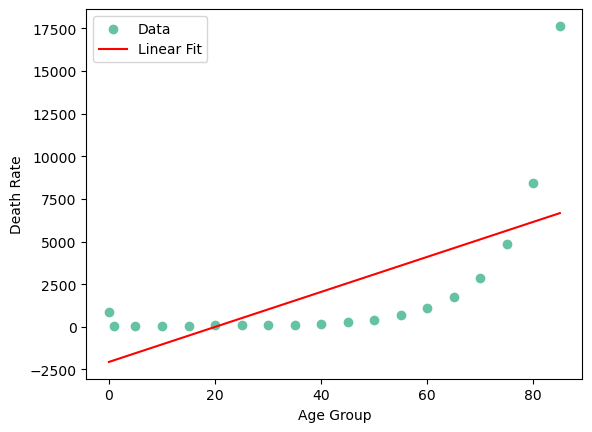

In [95]:
age_group = np.array([0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])
che_death_rate = np.array([868.436500, 47.700580, 24.522146, 21.786966, 55.370057, 81.494782, 76.897437, 84.380682, 109.057212, 165.724616, 264.587196, 427.775572, 687.391956, 1093.365944, 1762.592939, 2862.457383, 4827.363131, 8408.559995, 17638.663727])

slope, intercept, r_value, p_value, std_err = stats.linregress(age_group, che_death_rate)

plt.scatter(age_group, che_death_rate, label="Data")
plt.plot(age_group, slope * age_group + intercept, color='red', label="Linear Fit")
plt.xlabel("Age Group")
plt.ylabel("Death Rate")
plt.legend()

print(f"Correlation coefficient (r): {r_value:.2f}")

plt.show()

2. Exponential Fitting

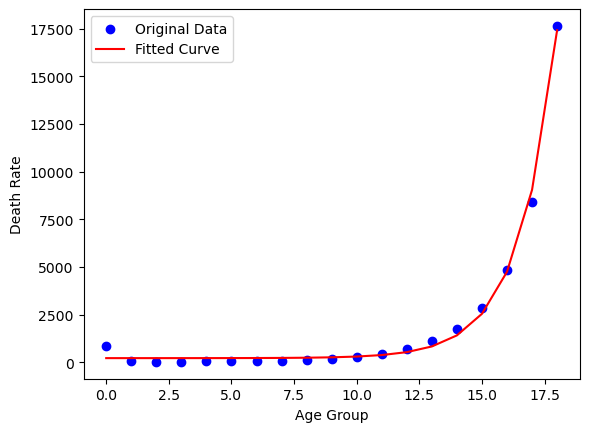

R-squared (R²): 0.9957687522539796


In [141]:
age_groups = np.arange(19)  
death_rates = [868.436500, 47.700580, 24.522146, 21.786966, 55.370057, 81.494782, 76.897437, 84.380682, 109.057212, 165.724616, 264.587196, 427.775572, 687.391956, 1093.365944, 1762.592939, 2862.457383, 4827.363131, 8408.559995, 17638.663727]

r_squared = fit_exponential_curve(age_groups, death_rates)
print("R-squared (R²):", r_squared)

3. Polynomial fitting

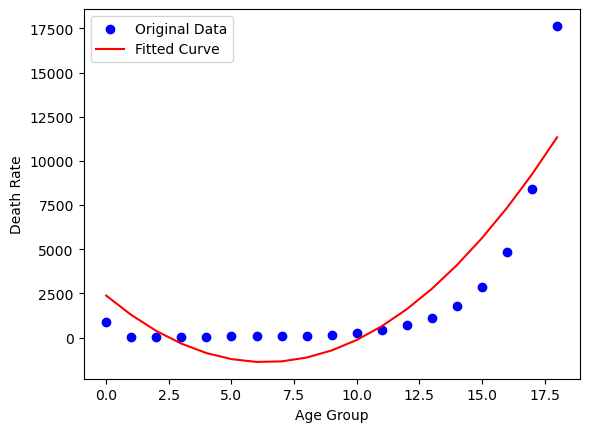

R-squared (R²): 0.7719599984143325


In [150]:
degree = 2
age_groups = np.arange(19)  
death_rates = [868.436500, 47.700580, 24.522146, 21.786966, 55.370057, 81.494782, 76.897437, 84.380682, 109.057212, 165.724616, 264.587196, 427.775572, 687.391956, 1093.365944, 1762.592939, 2862.457383, 4827.363131, 8408.559995, 17638.663727]

fit_polynomial_curve(degree, age_groups, death_rates)


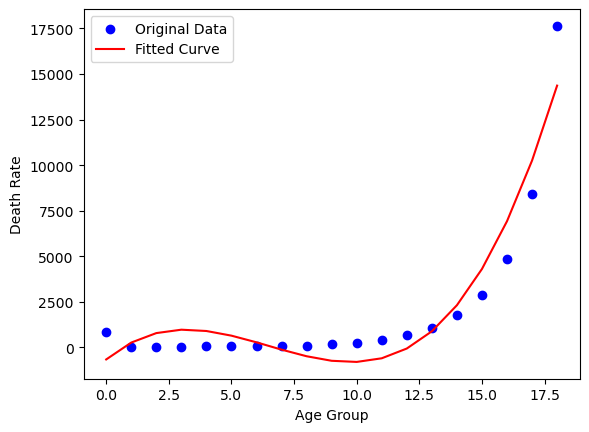

R-squared (R²): 0.9115001215490746


In [145]:
degree = 3
age_groups = np.arange(19)  
death_rates = [868.436500, 47.700580, 24.522146, 21.786966, 55.370057, 81.494782, 76.897437, 84.380682, 109.057212, 165.724616, 264.587196, 427.775572, 687.391956, 1093.365944, 1762.592939, 2862.457383, 4827.363131, 8408.559995, 17638.663727]

fit_polynomial_curve(degree, age_groups, death_rates)

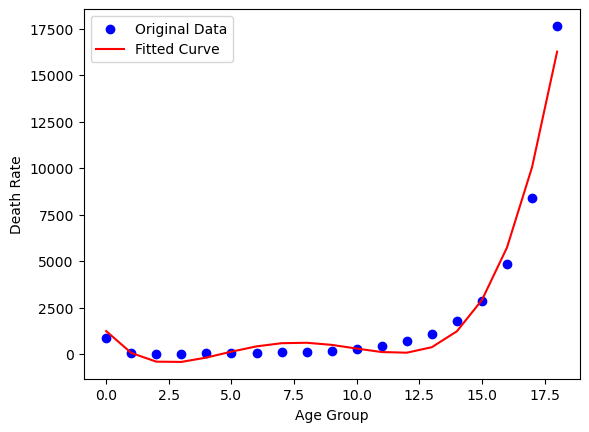

R-squared (R²): 0.9762606911713828


In [146]:
degree = 4
age_groups = np.arange(19)  
death_rates = [868.436500, 47.700580, 24.522146, 21.786966, 55.370057, 81.494782, 76.897437, 84.380682, 109.057212, 165.724616, 264.587196, 427.775572, 687.391956, 1093.365944, 1762.592939, 2862.457383, 4827.363131, 8408.559995, 17638.663727]

fit_polynomial_curve(degree, age_groups, death_rates)

III. Comparison between 2 countries for all age groups

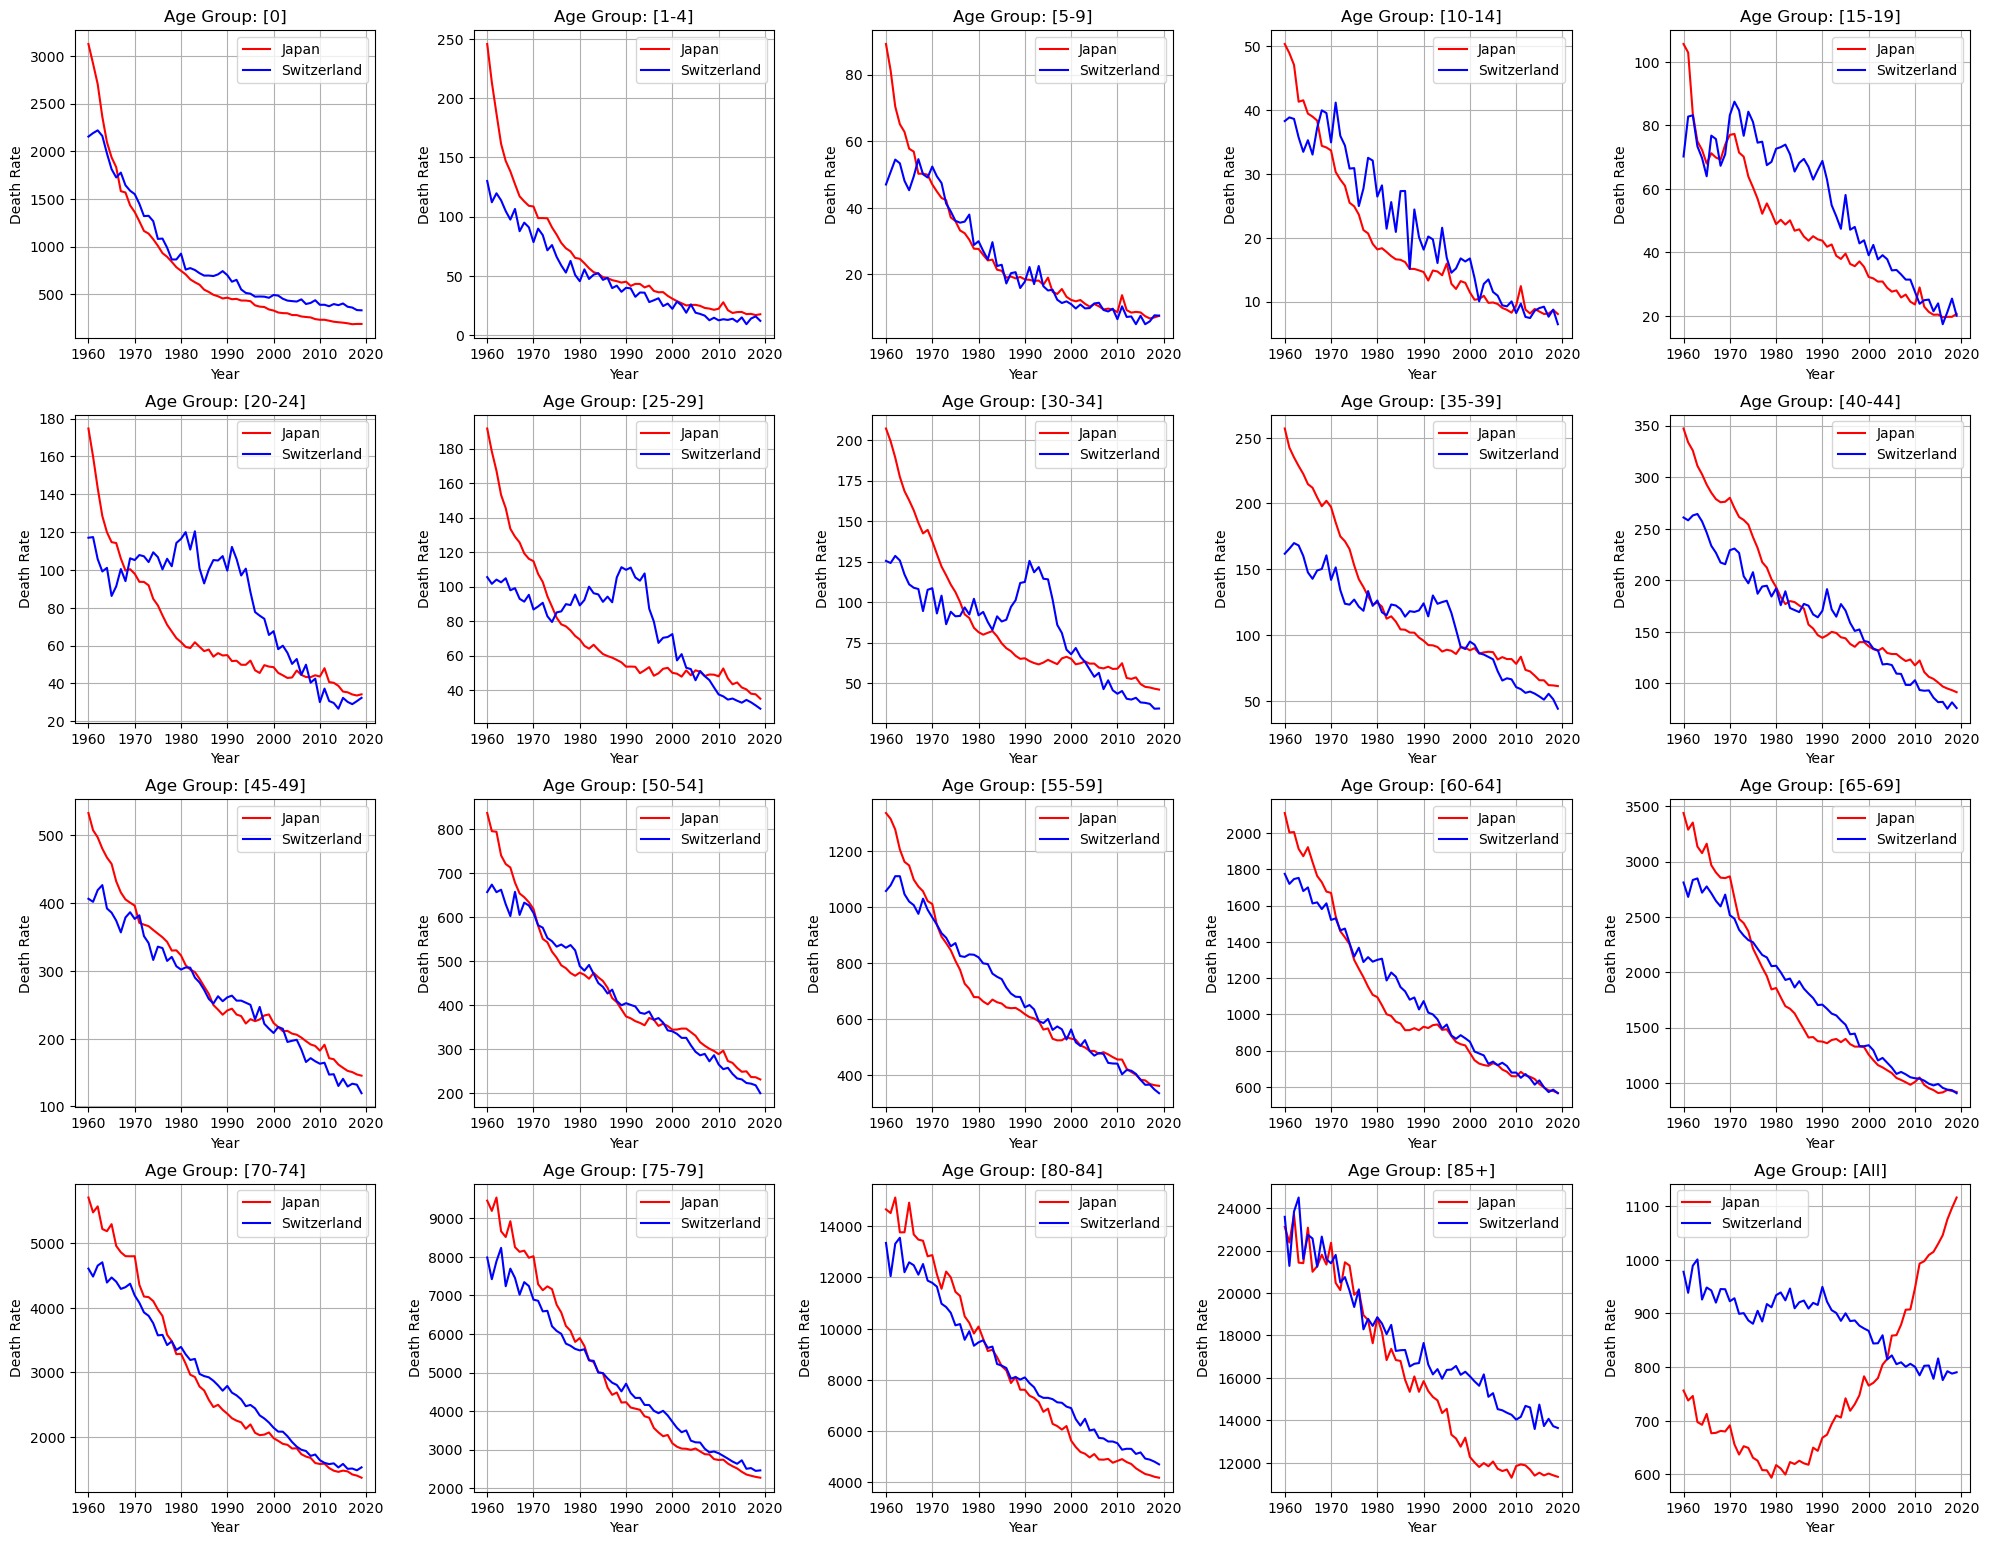

In [153]:
df_jpn_all = Japan[Japan['Sex'] == 'All']
df_che_all = Switzerland[Switzerland['Sex'] == 'All']

age_groups = [
    '[0]',
    '[1-4]',
    '[5-9]',
    '[10-14]',
    '[15-19]',
    '[20-24]',
    '[25-29]',
    '[30-34]',
    '[35-39]',
    '[40-44]',
    '[45-49]',
    '[50-54]',
    '[55-59]',
    '[60-64]',
    '[65-69]',
    '[70-74]',
    '[75-79]',
    '[80-84]',
    '[85+]',
    '[All]'
]

fig, axes = plt.subplots(4, 5, figsize=(20, 16))

# Graphs for every age group
for i, age_group in enumerate(age_groups):
    row = i // 5  
    col = i % 5  
    
    age_group_data_jpn = df_jpn_all[df_jpn_all['Age Group'] == age_group]
    age_group_data_che = df_che_all[df_che_all['Age Group'] == age_group]
    
    years_jpn = age_group_data_jpn['Year']
    death_rates_jpn = age_group_data_jpn['Death rate per 100 000 population']
    
    years_che = age_group_data_che['Year']
    death_rates_che = age_group_data_che['Death rate per 100 000 population']
    
    axes[row, col].plot(years_jpn, death_rates_jpn, label='Japan', color='red')
    axes[row, col].plot(years_che, death_rates_che, label='Switzerland', color='blue')
    axes[row, col].set_title(f'Age Group: {age_group}')
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Death Rate')
    axes[row, col].grid(True)
    axes[row, col].legend()

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


In [151]:
def calculate_statistics(data, age_groups):
    
    grouped_data = data[data['Age Group'].isin(age_groups)].groupby('Age Group')
    
    mean_values = grouped_data['Death rate per 100 000 population'].mean()
    max_values = grouped_data['Death rate per 100 000 population'].max()
    min_values = grouped_data['Death rate per 100 000 population'].min()
    std_values = grouped_data['Death rate per 100 000 population'].std()
    
    return mean_values, max_values, min_values,std_values

age_group_0_19 = ['[0]', '[1-4]', '[5-9]', '[10-14]', '[15-19]']

age_group_20_64 = ['[20-24]', '[25-29]', '[30-34]', '[35-39]', '[40-44]', '[45-49]', '[50-54]', '[55-59]', '[60-64]']

age_group_65 = ['[65-69]', '[70-74]', '[75-79]', '[80-84]', '[85+]']

mean_0_19, max_0_19, min_0_19,std_0_19 = calculate_statistics(df_jpn_all, age_group_0_19)
mean_20_64, max_20_64, min_20_64,std_20_64  = calculate_statistics(df_jpn_all, age_group_20_64)
mean_65, max_65, min_65, std_65 = calculate_statistics(df_jpn_all, age_group_65)

print("JPN 0-19 - Mean:\n", mean_0_19,':\nMax',max_0_19,':\nMin',min_0_19, ':\n Std', std_0_19)
print("20-64 - Mean:\n", mean_20_64,':\nMax',max_20_64,':\nMin',min_20_64, ':\n Std',std_20_64)
print("65+ - Mean:\n", mean_65,':\nMax',max_65,':\nMin',min_65, ':\n Std', std_65)


JPN 0-19 - Mean:
 Age Group
[0]        781.422116
[1-4]       63.198763
[10-14]     19.360008
[15-19]     46.517995
[5-9]       26.498756
Name: Death rate per 100 000 population, dtype: float64 :
Max Age Group
[0]        3125.943307
[1-4]       245.696051
[10-14]      50.328565
[15-19]     105.590529
[5-9]        89.183669
Name: Death rate per 100 000 population, dtype: float64 :
Min Age Group
[0]        185.862816
[1-4]       16.813023
[10-14]      8.047239
[15-19]     19.592085
[5-9]        6.761145
Name: Death rate per 100 000 population, dtype: float64 :
 Std Age Group
[0]        722.594467
[1-4]       50.950601
[10-14]     11.781525
[15-19]     21.145625
[5-9]       20.085135
Name: Death rate per 100 000 population, dtype: float64
20-64 - Mean:
 Age Group
[20-24]      66.626670
[25-29]      73.587714
[30-34]      88.410487
[35-39]     122.225673
[40-44]     182.293786
[45-49]     282.936109
[50-54]     440.276268
[55-59]     683.432761
[60-64]    1073.640749
Name: Death rate per 1

In [152]:
mean_0_19, max_0_19, min_0_19,std_0_19 = calculate_statistics(df_che_all, age_group_0_19)
mean_20_64, max_20_64, min_20_64,std_20_64 = calculate_statistics(df_che_all, age_group_20_64)
mean_65, max_65, min_65, std_65 = calculate_statistics(df_che_all, age_group_65)

print("CHE 0-19 - Mean:\n", mean_0_19,':\nMax',max_0_19,':\nMin',min_0_19, ':\n Std', std_0_19)
print("20-64 - Mean:\n", mean_20_64,':\nMax',max_20_64,':\nMin',min_20_64, ':\n Std',std_20_64)
print("65+ - Mean:\n", mean_65,':\nMax',max_65,':\nMin',min_65, ':\n Std', std_65)

CHE 0-19 - Mean:
 Age Group
[0]        868.436500
[1-4]       47.700580
[10-14]     21.786966
[15-19]     55.370057
[5-9]       24.522146
Name: Death rate per 100 000 population, dtype: float64 :
Max Age Group
[0]        2219.879518
[1-4]       130.014225
[10-14]      41.151386
[15-19]      87.430478
[5-9]        54.603175
Name: Death rate per 100 000 population, dtype: float64 :
Min Age Group
[0]        331.638034
[1-4]        9.091549
[10-14]      6.448239
[15-19]     17.367737
[5-9]        5.037699
Name: Death rate per 100 000 population, dtype: float64 :
 Std Age Group
[0]        564.191424
[1-4]       33.065375
[10-14]     10.909525
[15-19]     21.120854
[5-9]       16.399601
Name: Death rate per 100 000 population, dtype: float64
20-64 - Mean:
 Age Group
[20-24]      81.494782
[25-29]      76.897437
[30-34]      84.380682
[35-39]     109.057212
[40-44]     165.724616
[45-49]     264.587196
[50-54]     427.775572
[55-59]     687.391956
[60-64]    1093.365944
Name: Death rate per 1